In [1]:
from pathlib import Path
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from mpl_toolkits.basemap import Basemap
import utide
import datetime
import plotly.express as px
from adjustText import adjust_text
from dateutil.relativedelta import relativedelta 
from datetime import date

In [2]:
TG_loc_INCOIS = pd.read_csv('/Volumes/RB/WORK/RAW_TG_DATA/INCOIS_TG/Readme.txt',delimiter='\t\t',nrows=35)
TG_loc_NIOT   = pd.read_csv('/Volumes/RB/WORK/RAW_TG_DATA/NIOT_TideData/Readme.txt',delimiter='\t',nrows=14)

/Volumes/RB/opt/anaconda3/lib/python3.9/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


6

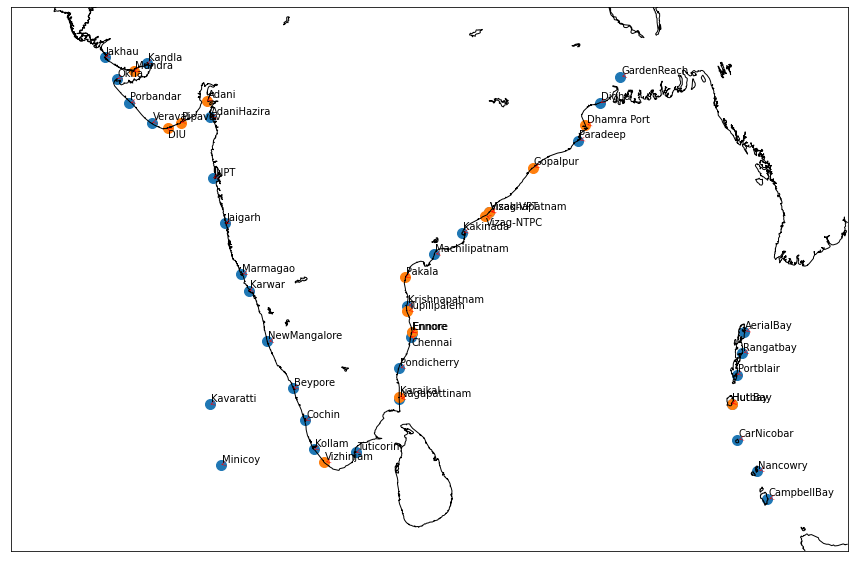

In [3]:
plt.figure(figsize=(15, 15))
m = Basemap(llcrnrlon = 65, llcrnrlat = 5, urcrnrlon = 97, urcrnrlat = 25, resolution = 'i', projection = 'merc')
#m.etopo(scale=0.5, alpha=0.5)
m.drawcoastlines(color = 'black')
x1, y1 = m(list(TG_loc_INCOIS['Longitude']), list(TG_loc_INCOIS['Latitude']))
l1     = TG_loc_INCOIS['Station ']
x2, y2 = m(list(TG_loc_NIOT['Longitude']), list(TG_loc_NIOT['Latitude']))
l2     = TG_loc_NIOT['Station Name']
#ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
#            arrowprops=dict(facecolor='black', shrink=0.05))
m.scatter(x1, y1,100,marker='o')
m.scatter(x2, y2,100,marker='o')
texts1 = [plt.text(x1[i], y1[i], l1[i]) for i in range(len(x1))]
adjust_text(texts1, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))
texts2 = [plt.text(x2[i], y2[i], l2[i]) for i in range(len(x2))]
adjust_text(texts2, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))

In [4]:
#  read TG data from a location csv file

#    """combine all files with same TG ID
#    Parameters:
#    ============
#        ID: str
#            Location of TG to combine data
#    Returns:
#    ===========
#        combined_data: pandas Dataframe

def readData(fpath):
    data = pd.read_csv(fpath,header=None,names=['name','datetimes','rad','prs','enc'],parse_dates={'datetime':[1]},index_col='datetime',na_values=9999.99).drop_duplicates()
    return data

def readTG(ID):
    fp = glob.glob(f'/Volumes/RB/WORK/RAW_TG_DATA/INCOIS_TG/{ID}_*.csv',recursive = True)
    #fp = glob.glob(f'/Volumes/RB/WORK/RAW_TG_DATA/INCOIS_TG/{ID}_2018.csv',recursive = True)
    df = pd.concat([readData(f) for f in fp])
    return (ID,df.asfreq(freq='min'))

In [5]:
i=0
ptg=np.zeros((len(TG_loc_INCOIS),4))
for sta in TG_loc_INCOIS['Station ']:
    print(sta)
    ID,TG   = readTG(sta)
    Sensor1 = TG.loc[:,'rad']
    Sensor2 = TG.loc[:,'prs']
    Sensor3 = TG.loc[:,'enc']
    Sens=[Sensor1,Sensor2,Sensor3]
    j=0
    for x in Sens:
        ptg[i][j] = (len(x.dropna())/len(x))*100
        j=j+1
    ind=np.argmax(ptg[i,0:3])
    fp  = Sens[ind].dropna().first_valid_index()
    lp  = Sens[ind].dropna().last_valid_index()
    ptg[i][3] = (lp - fp)/np.timedelta64(1, 'Y')
    i=i+1

AdaniHazira
AerialBay
Beypore
CampbellBay
CarNicobar
Chennai
Cochin
Digha
Ennore
GardenReach
Hutbay
Jaigarh
Jakhau
JNPT
Kakinada
Kandla
Karwar
Kavaratti
Kollam
Krishnapatnam
Machilipatnam
Marmagao
Minicoy
Nagapattinam
Nancowry
NewMangalore
Okha
Paradeep
Pondicherry
Porbandar
Portblair
Rangatbay
Tuticorin
Veraval
Visakhapatnam


In [6]:
TG_loc_INCOIS['RAD'] = ptg[:,0]
TG_loc_INCOIS['PRS'] = ptg[:,1]
TG_loc_INCOIS['ENC'] = ptg[:,2]
TG_loc_INCOIS['TY'] = ptg[:,3]

In [7]:
TG_loc_INCOIS.head()

,Station,Longitude,Latitude,RAD,PRS,ENC,TY
0,AdaniHazira,72.616,21.100,0.231004,0.000000,0.000000,2.691437
1,AerialBay,93.033,13.283,78.786077,78.741652,78.774752,8.260132
2,Beypore,75.808,11.171,0.090976,0.000000,0.000000,2.689735
3,CampbellBay,93.933,7.000,44.050063,47.080438,45.307676,7.920136
4,CarNicobar,92.776,9.234,0.117316,0.000000,0.000000,0.568859


In [8]:
TG_low = TG_loc_INCOIS.loc[(TG_loc_INCOIS['TY'] >=0)&(TG_loc_INCOIS['TY'] < 2)]
TG_mid = TG_loc_INCOIS.loc[(TG_loc_INCOIS['TY'] >=2)&(TG_loc_INCOIS['TY'] < 7)]
TG_hig = TG_loc_INCOIS.loc[(TG_loc_INCOIS['TY'] >=7)&(TG_loc_INCOIS['TY'] < 11)]

In [50]:
sig= np.array(TG_loc_INCOIS['TY'])
rad_per=np.array(TG_loc_INCOIS['RAD'])
rad_per=np.array(TG_loc_INCOIS['RAD'])

In [52]:
rad_per

array([2.31003984e-01, 7.87860771e+01, 9.09756020e-02, 4.40500625e+01,
       1.17315971e-01, 5.33242980e+01, 6.41067004e+01, 1.19630874e-01,
       6.33831613e+01, 7.22724202e+01, 1.34315074e+00, 1.01184965e-01,
       1.14562189e+00, 6.87884081e+01, 5.49157517e+01, 4.08563095e+01,
       5.42008245e+01, 3.84378817e+01, 3.82524684e-02, 1.35679837e+01,
       4.73185726e-02, 7.74706095e-02, 3.92312432e+01, 5.44325712e+01,
       3.31924425e+01, 6.60987097e+01, 7.81813791e+01, 6.98115228e+01,
       6.25424170e-02, 8.40546708e-02, 6.02851250e+01, 1.00570853e-01,
       5.42265332e+01, 8.44688309e-02, 7.46227890e+01])

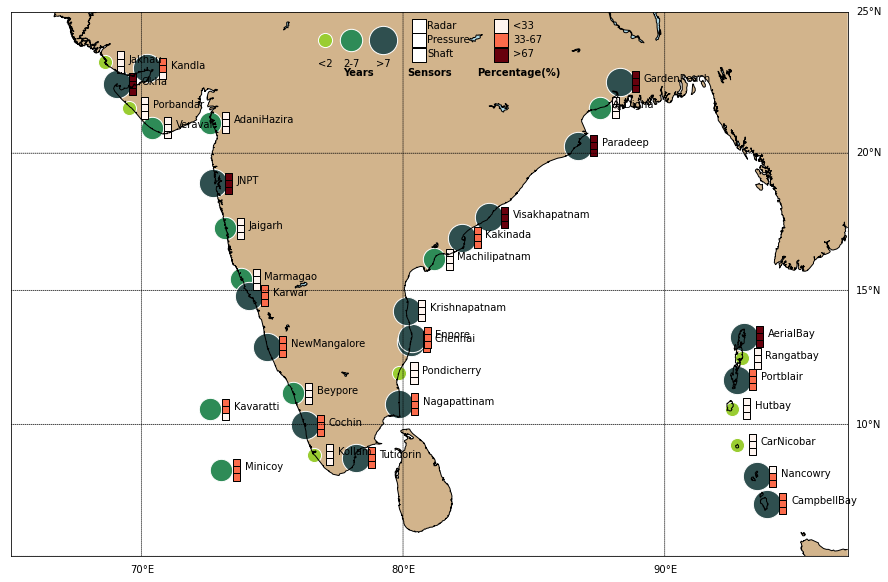

In [150]:
plt.figure(figsize=(15, 15))

m = Basemap(llcrnrlon = 65, llcrnrlat = 5, urcrnrlon = 97, urcrnrlat = 25, resolution = 'i', projection = 'merc')
m.fillcontinents(color='tan',lake_color='lightblue',zorder=0)
m.drawcoastlines(color = 'black')

#color defining 
import matplotlib.colors as colors
bounds = np.linspace(0, 100, 4)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

xr,yr = m([77,78,79.25],[24,24,24])
m.scatter(xr[0],yr[0],s=200,marker="o",alpha=1.0,color='yellowgreen',ec='white')
plt.text(xr[0]-30000,yr[0]-110000,'<2')
m.scatter(xr[1],yr[1],s=500,marker="o",alpha=1.0,color='seagreen',ec='white')
plt.text(xr[1]-30000,yr[1]-110000,'2-7')
m.scatter(xr[2],yr[2],s=800,marker="o",alpha=1.0,color='darkslategray',ec='white')
plt.text(xr[2]-30000,yr[2]-110000,'>7')

m.scatter(xr[2]+150000,yr[2]+60000,s=200,marker="s",alpha=1.,color='white',ec='black')
m.scatter(xr[2]+150000,yr[2]+00000,s=200,marker="s",alpha=1.,color='white',ec='black')
m.scatter(xr[2]+150000,yr[2]-60000,s=200,marker="s",alpha=1.,color='white',ec='black')
plt.text(xr[2]+185000,yr[2]+50000,'Radar')
plt.text(xr[2]+185000,yr[2]-10000,'Pressure')
plt.text(xr[2]+185000,yr[2]-70000,'Shaft')

m.scatter(xr[2]+500000,yr[2]+60000,s=200,c=22,marker="s",cmap='Reds',norm=norm,ec='black')
m.scatter(xr[2]+500000,yr[2]+00000,s=200,c=44,marker="s",cmap='Reds',norm=norm,ec='black')
m.scatter(xr[2]+500000,yr[2]-60000,s=200,c=70,marker="s",cmap='Reds',norm=norm,ec='black')
plt.text(xr[2]+550000,yr[2]+50000,'<33')
plt.text(xr[2]+550000,yr[2]-10000,'33-67')
plt.text(xr[2]+550000,yr[2]-70000,'>67')
plt.text(xr[2]+400000,yr[2]-150000,'Percentage(%)',weight='bold')
plt.text(xr[2]+100000,yr[2]-150000,'Sensors',weight='bold')
plt.text(xr[2]-170000,yr[2]-150000,'Years',weight='bold')
xlow, ylow = m(list(TG_low['Longitude']), list(TG_low['Latitude']))
xmid, ymid = m(list(TG_mid['Longitude']), list(TG_mid['Latitude']))
xhig, yhig = m(list(TG_hig['Longitude']), list(TG_hig['Latitude']))
#l1     = TG_loc_INCOIS['Station ']
#z1     = ptg[:,3]
m.scatter(xlow, ylow,s=200,marker="o",alpha=1.0,color='yellowgreen',ec='white')
m.scatter(xmid, ymid,s=500,marker="o",alpha=1.0,color='seagreen',ec='white')
m.scatter(xhig, yhig,s=800,marker="o",alpha=1.0,color='darkslategray',ec='white')

#plotting % of data in individual sensors Radar, Pressure gaugeu and ENC
xf, yf = m(TG_loc_INCOIS['Longitude'], TG_loc_INCOIS['Latitude'])
rad_per=np.array(TG_loc_INCOIS['RAD'])
prs_per=np.array(TG_loc_INCOIS['PRS'])
enc_per=np.array(TG_loc_INCOIS['ENC'])

m.scatter(xf+65000,yf+30000,s=50,c=rad_per,marker="s",cmap='Reds',norm=norm,ec='black')
m.scatter(xf+65000,yf+00000,s=50,c=prs_per,marker="s",cmap='Reds',norm=norm,ec='black')
m.scatter(xf+65000,yf-30000,s=50,c=enc_per,marker="s",cmap='Reds',norm=norm,ec='black')
#plt.colorbar(shrink=0.3)
# TG text 
texts1 = [plt.text(x1[i]+100000, y1[i], l1[i]) for i in range(len(x1))]
#adjust_text(texts1, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))
#adjust_text(texts1, arrowprops=dict(arrowstyle='->', color='red',lw=0.5))
parallels = np.arange(0.,30,5.)
m.drawparallels(parallels,labels=[False,True,True,False])
meridians = np.arange(70.,100.,10.)
m.drawmeridians(meridians,labels=[True,False,False,True])
#plt.savefig('destination_path.eps', format='eps')

(-200.0, 400.0)

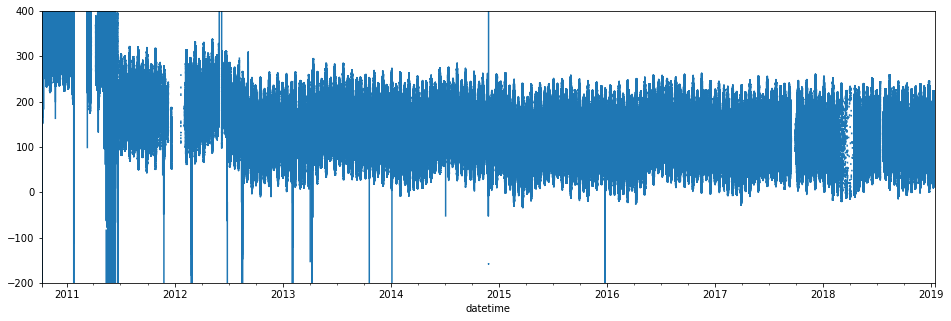

In [17]:
Sensor1.plot(figsize=(16,5));plt.ylim(-200,400)

In [33]:

fp  = Sensor2.dropna().first_valid_index()
lp  = Sensor2.dropna().last_valid_index()
print(fp,lp)

2010-10-08 05:01:00 2019-01-11 03:51:00


In [36]:
(len(Sensor2.dropna())/len(Sensor2))*100

78.7416522055579